# Data visualizer for all participants in AV_experiment
Ignore first part, its just housekeeping

In [1]:
#Import Statements
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
import seaborn as sns

sns.set(palette="bright")
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

In [2]:
# declare global helpers
condition_values = ['0ms','10ms','400ms','10ms echo','400ms echo']
condition_values_sorted = ['0ms','10ms','10ms echo','400ms','400ms echo']
groupnames = [0,1,2,3,4]
browsernames = ["MSIE", "Firefox", "Safari", "Chrome", "Opera"]

In [3]:
#read in source csv
df = pd.read_csv(r'data/results_pavlovia.csv', encoding='utf-8-sig', 
                  low_memory=False
                 )

## Data repair

# Correct BOM
group = []
for x in df['group']:

    if x == '\ufeff':
        group.append(np.nan)
    elif x == '\ufeff0':
        group.append(0)
    elif x == '\ufeff1':
        group.append(1)
    elif x == '\ufeff2':
        group.append(2)
    elif x == '\ufeff3':
        group.append(3)
    elif x == '\ufeff4':
        group.append(4)

group = pd.Series(group)

df['group'] = group

In [4]:
# show all included participants
df['participant'].unique()

array([  5,  15,  20,  22,  36,  37,  42,  45,  47,  49,  51,  53,  56,
        57,  59,  60,  63,  64,  71,  73,  76,  77,  79,  82,  83,  88,
        90,  89,  91,  94,  97,  98,  99, 101, 102, 103, 107, 108, 110,
       112, 113, 114, 120, 121, 122, 123, 127, 138, 139, 143, 148, 151,
       154, 155, 162, 163, 166, 152, 167, 168, 169, 170, 171, 173, 174,
       175, 176, 178, 180, 181, 182, 183, 184, 187, 190, 191, 192, 193,
       194, 196, 197, 195, 198, 185, 150], dtype=int64)

## Participant exclusion

In [5]:
# Exclude Participants 
p_exclude= [5,  15,  20,  22,  36,  37,  42,  45,  47,  49,  51,  53,  56, 79, 90, 167, 168, 64, 180, 99, 167,
            71,121, 57,77,97, 197,182, 63,73,88,103,113,138,163,183
           ] # 5 was me, 47 performed bad
for p in p_exclude:
    df = df[df['participant'] != p] 

In [6]:
# Invert wrong results for even participants
p_invert = [60,64,76,82,88,90,94,98,102,108,110,112,114,120,122,138,148,152,154,162,166,168,170,174,176,178,180,182,184,190,192,194,196,150,198]
for p in p_invert:
    inverted = df.loc[(df['participant'] == p) & (df['trials.ran'] == 1), ['choice_response.corr']].replace(to_replace = {0: 1, 1:0})
    df.loc[(df['participant'] == p) & (df['trials.ran'] == 1), ['choice_response.corr']] = inverted

## save corrected df to csv


In [7]:
df.to_csv(r'data/corr_results.csv',  header=True, encoding='utf-8-sig')

In [8]:
 df_test = df.loc[df['id'] == 'test']
    
    #count participants
parts_test = df_test['participant'].unique()
print('Number of participants: ', len(parts_test))
print('Their IDs: ', parts_test)

Number of participants:  0
Their IDs:  []


In [9]:
 df_pilot = df.loc[df['id'] == 'pilot']
    
    #count participants
parts_pilot = df_pilot['participant'].unique()
print('Number of participants: ', len(parts_pilot))
print('Their IDs: ', parts_pilot)

Number of participants:  2
Their IDs:  [59 60]


In [10]:
 df_public = df.loc[df['id'] == 'public']
    
    #count participants
parts_public = df_public['participant'].unique()
print('Number of participants: ', len(parts_public))
print('Their IDs: ', parts_public)

parts = df['participant'].unique()

Number of participants:  45
Their IDs:  [ 76  82  83  89  91  94  98 101 102 107 108 110 112 114 120 122 123 127
 139 143 148 151 154 155 162 166 152 169 170 171 173 174 175 176 178 181
 184 187 190 191 192 193 194 196 198]


## General Information
Here a an overview over participant data is intended, without looking at main effects

(167, 168, 64, 180, 99, 167)) 

In [11]:
#count participants
parts = df['participant'].unique()
print('Number of participants: ', len(parts))
group0 =  [i for i in parts if i % 5 == 0]
group1 =  [i for i in parts if i % 5 == 1]
group2 =  [i for i in parts if i % 5 == 2]
group3 =  [i for i in parts if i % 5 == 3]
group4 =  [i for i in parts if i % 5 == 4]
print("Group 0 : " , group0)
print("Group 1 : " , group1)
print("Group 2 : " , group2)
print("Group 3 : " , group3)
print("Group 4 : " , group4)

Number of participants:  50
Group 0 :  [60, 110, 120, 155, 170, 175, 190, 195, 185, 150]
Group 1 :  [76, 91, 101, 151, 166, 171, 176, 181, 191, 196]
Group 2 :  [82, 102, 107, 112, 122, 127, 162, 152, 187, 192]
Group 3 :  [83, 98, 108, 123, 143, 148, 173, 178, 193, 198]
Group 4 :  [59, 89, 94, 114, 139, 154, 169, 174, 184, 194]


No handles with labels found to put in legend.


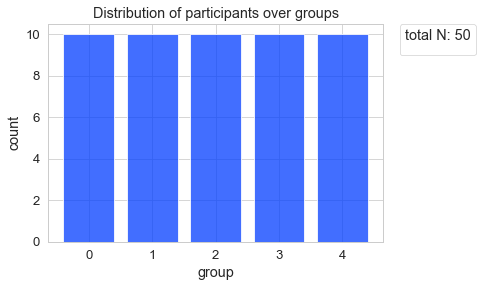

In [12]:
#group distribution
groups=[]
for p in parts:
    group = df[df['participant'] == p]['group'].median()
    groups.append(group)
groups

fig = plt.gcf()
# Change seaborn plot size
#fig.set_size_inches(5, 5)

sns.histplot( data=groups, 
             stat = 'count',
             #multiple="dodge", 
             discrete = True,
             shrink=.8
            ).set_xticks(groupnames)

# Change Axis labels:
plt.xlabel('group')
plt.ylabel('count')
plt.title('Distribution of participants over groups')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='total N: ' + str(len(parts)))

# save plot as PNG
plt.savefig("figures/group_spread.png", dpi=192, bbox_inches='tight')


No handles with labels found to put in legend.


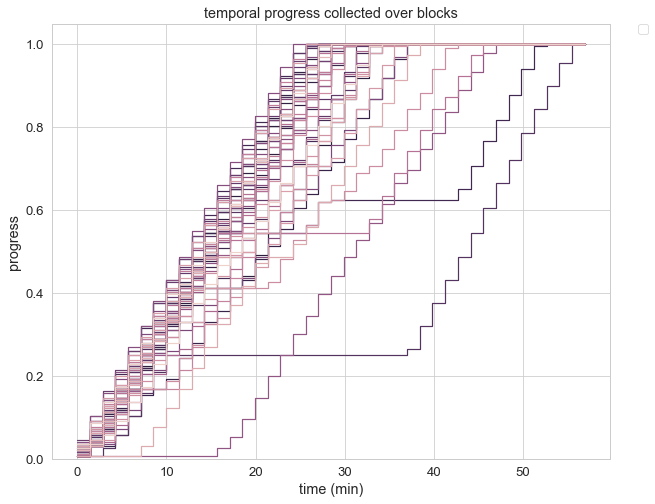

In [13]:
# plot time needed
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

time = df['globalClockTime'] / 60

sns.histplot( data=df, 
             x = time ,
             hue = 'participant',
             cumulative = True,
             element="step", fill=False,
             stat="density", 
             common_norm=False,
            )

#plt.xlabel('Group')
plt.ylabel('progress')
plt.xlabel('time (min)')
plt.title('temporal progress collected over blocks')
plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# save plot as PNG
plt.savefig("figures/time_all_p.png", dpi=192, bbox_inches='tight')

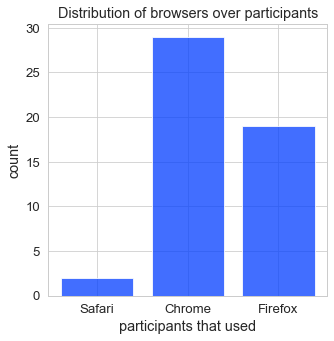

In [14]:
#browser distribution
browsers=[]
for p in parts:
    browser = df[df['participant'] == p]['browser'].any()
    browsers.append(browser)
browsers

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(5, 5)

ax = sns.histplot( data=browsers, 
             multiple="dodge", 
             shrink=.8)

plt.xlabel('participants that used')
plt.ylabel('count')
plt.title('Distribution of browsers over participants')

# save plot as PNG
plt.savefig("figures/browser_dist.png", dpi=192, bbox_inches='tight')

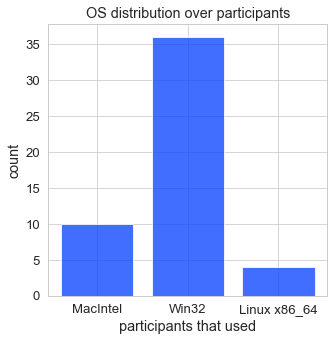

In [15]:
#OS distribution
osses=[]
for p in parts:
    os = df[df['participant'] == p]['OS'].any()
    osses.append(os)
osses

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(5,5)

sns.histplot( data=osses, 
            stat = 'count',
             #multiple="dodge", 
             discrete = True,
             multiple="dodge", 
             shrink=.8)

# Change Axis labels:
plt.xlabel('participants that used')
plt.ylabel('count')
plt.title('OS distribution over participants')

# save plot as PNG
plt.savefig("figures/os_dist.png", dpi=192, bbox_inches='tight')

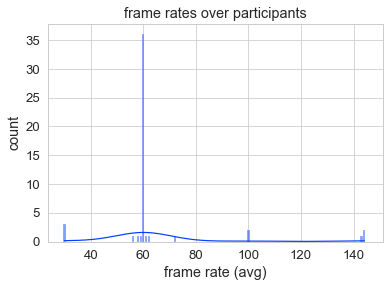

In [16]:
#framerate distribution
framerates=[]
for p in parts:
    fr = df.loc[df['participant'] == p,['frameRate']]
    framerates.append(fr.iloc[0,0])
    
fig = plt.gcf()
# Change seaborn plot size
#fig.set_size_inches(5, 5)

sns.histplot( data=framerates, 
            stat = 'count',
             #multiple="dodge", 
             discrete = True,
             multiple="dodge", 
             shrink=.8,
            kde = True)

# Change Axis labels:

plt.xlabel('frame rate (avg)')
plt.ylabel('count')
plt.title('frame rates over participants')

# save plot as PNG
plt.savefig("figures/fr_dist.png", dpi=192, bbox_inches='tight')

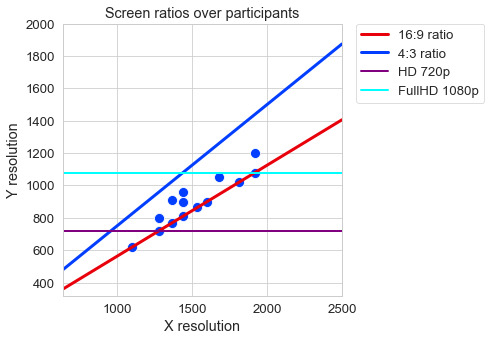

In [17]:
#resolution distribution
ressesX=[]
ressesY = []
for p in parts:
    resX = df[df['participant'] == p]['xResolution'].iloc[0]
    resY = df[df['participant'] == p]['yResolution'].iloc[0]
    ressesX.append(resX)
    ressesY.append(resY)


fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(5, 5)




ax = sns.scatterplot(x= ressesX,
                    y = ressesY,
                    s = 100,
                     x_jitter=1, 
                     y_jitter=1,
                   )

ax.axline((0,0), slope = 9/16, linewidth=3, color='r', label = '16:9 ratio')
ax.axline((0,0), slope = 3/4, linewidth=3, color='b', label = '4:3 ratio')
ax.axhline(720, linewidth=2, color='purple', label = 'HD 720p')
ax.axhline(1080, linewidth=2, color='cyan', label = 'FullHD 1080p')


ax.set(xlim=(640,2500))
ax.set(ylim=(320,2000))

# Change Axis labels:

plt.xlabel('X resolution')
plt.ylabel('Y resolution')
plt.title('Screen ratios over participants')

plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# save plot as PNG
plt.savefig("figures/resolutions.png", dpi=192, bbox_inches='tight')

# Analysis of choice trial
Core hypotheses: 
    RT in condition 0,1 and 3 is equivalent, 
    conditions 2 and 4 have larger RT. 
    Analogous for accuracy

## RT in choice Trial
Ideally, we can see 2 distinct peaks here, 1 close to 0 when the target was the first and a bigger one around 3 secs, where the second entity is known.

In [18]:
### Divide data into subsets correct / incorrect

# Filter out incorrect responses
df_corr = df.drop(df[df['choice_response.corr'] == 0].index)
df_corr = df_corr.drop(df_corr[df_corr['target_loc'] == 2].index)
#df_corr.shape

# Filter out correct responses
df_incorr = df.drop(df[df['choice_response.corr'] == 1].index)
df_incorr = df_incorr.drop(df_incorr[df_incorr['target_loc'] == 2].index)
#df_incorr.shape

# Only Filler trials
df_filler = df.drop(df[df['target_loc'] < 2].index)
#df_filler['target_loc'].unique()
# Only Filler trials
df_no_filler = df.drop(df[df['target_loc'] == 2].index)

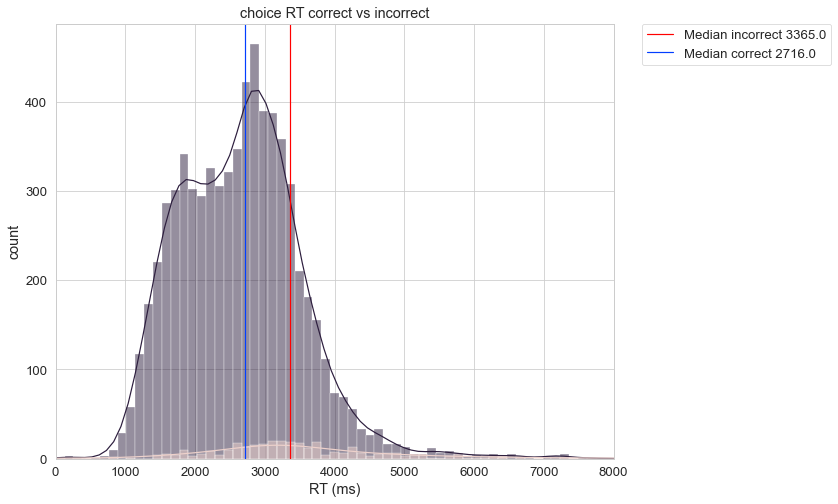

In [19]:
mean0 = df.loc[df['choice_response.corr'] == 0]['choice_response.rt'].mean() *1000
mean1 = df.loc[df['choice_response.corr'] == 1]['choice_response.rt'].mean().round(2)*1000
median0 = df.loc[df['choice_response.corr'] == 0]['choice_response.rt'].median().round(3)*1000
median1 = df.loc[df['choice_response.corr'] == 1]['choice_response.rt'].median().round(3)*1000

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)




ax = sns.histplot(data = df_no_filler,
             x = df['choice_response.rt'] * 1000,
             hue = 'choice_response.corr',
            #col = 'imagePos',
            # label = ,
            kde=True)

ax.axvline(median0,label = 'Median incorrect ' + str(median0), 
           color = 'red'
          )
ax.axvline(median1,label = 'Median correct ' + str(median1),
         #  color = 'green'
          )

ax.set(xlim=(0, 8000))


# Change Axis labels:
plt.xlabel('RT (ms)')
plt.ylabel('count')
plt.title('choice RT correct vs incorrect')
plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# save plot as PNG
plt.savefig("figures/rt_choice_corr_vs_incorr.png", dpi=192, bbox_inches='tight')

## Data filtering

In [20]:
mean0 = df.loc[df['target_loc'] == 0]['choice_response.rt'].mean().round(3) *1000
mean1 = df.loc[df['target_loc'] == 1]['choice_response.rt'].mean().round(3)*1000
mean2 = df.loc[df['target_loc'] == 2]['choice_response.rt'].mean().round(3)*1000

median0 = df.loc[df['target_loc'] == 0]['choice_response.rt'].median().round(3)*1000
median1 = df.loc[df['target_loc'] == 1]['choice_response.rt'].median().round(3)*1000
median2 = df.loc[df['target_loc'] == 2]['choice_response.rt'].median().round(3)*1000

print('Mean and Median when Target left: ', mean0, median0)
print('Mean and Median when Target right: ', mean1, median1)
print('Mean and Median when Target wrong: ', mean2, median2)

Mean and Median when Target left:  2225.0 2004.0
Mean and Median when Target right:  3199.0 3068.0
Mean and Median when Target wrong:  3382.0 3322.0


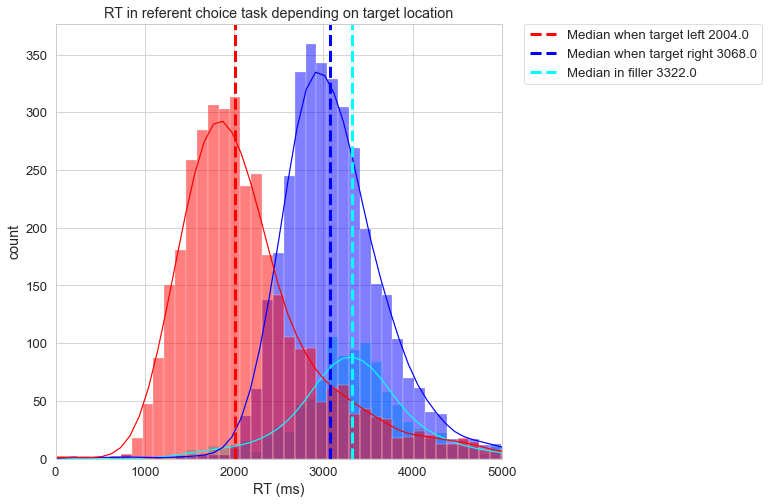

In [21]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(8, 8)

ax = sns.histplot(data = df,
             x = df['choice_response.rt'] *1000,
             hue = 'target_loc',
             #label=["Target left", 'Target right', 'filler'],
                  legend = True,
               kde=True,
                 palette = ['red','blue','cyan'],
                 )

ax.axvline(median0,label = 'Median when target left ' + str(median0), 
           color = 'red', 
           linestyle='--', 
           linewidth=3
          )
ax.axvline(median1 ,label = 'Median when target right ' + str(median1),
           color = 'blue', 
           linestyle='--', 
           linewidth=3
          )
ax.axvline(median2,label = 'Median in filler ' + str(median2), 
           color = 'cyan', 
           linestyle='--', 
           linewidth=3
          )
ax.set(xlim=(0, 5000))

#plt.legend()

# Change Axis labels:
plt.xlabel('RT (ms)')
plt.ylabel('count')
plt.title('RT in referent choice task depending on target location')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# save plot as PNG
plt.savefig("figures/rt_choice_by_location.png", dpi=192, bbox_inches='tight')

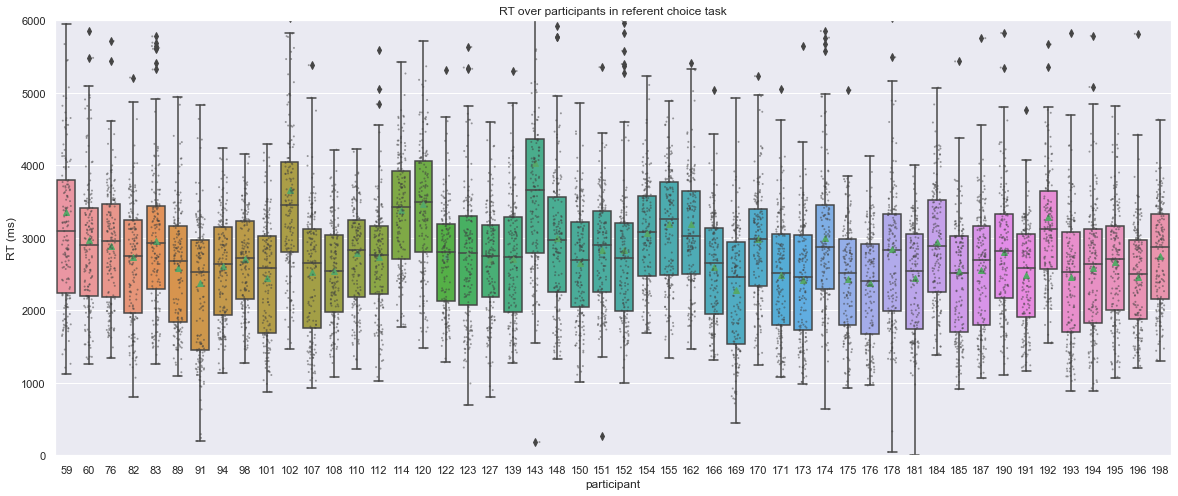

In [22]:
#mean rt of all participants (correct and incorrect)

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(20, 8)


sns.set(font_scale=1)


ax = sns.boxplot(y=df['choice_response.rt']* 1000, 
                 x="participant",
                 data=df,
                showmeans=True,
                #orient = 'h',
                )

sns.stripplot(y=df['choice_response.rt']* 1000, 
             x="participant",
             data=df,
             color=".25",
             size = 2,
             alpha=0.5,
             jitter=0.2,
             )

ax.set(ylim=(0, 6000))

# Change Axis labels:
plt.xlabel('participant')
plt.ylabel('RT (ms)')
plt.title('RT over participants in referent choice task')

# save plot as PNG
plt.savefig("figures/rt_choice_by_participant.png", dpi=192, bbox_inches='tight')

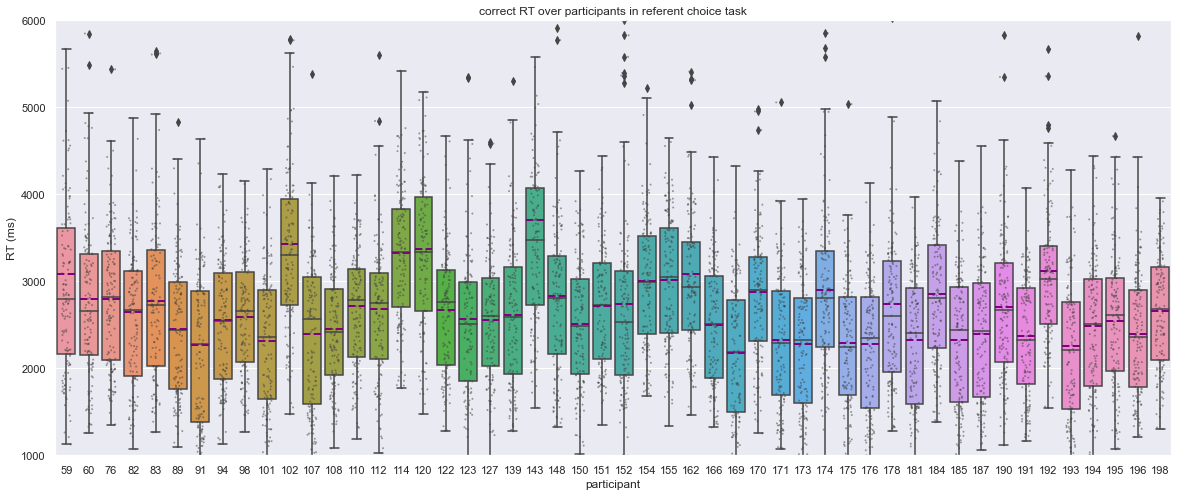

In [23]:
#mean rt of all participants (correct only)

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(20, 8)




ax = sns.boxplot(y=df['choice_response.rt']* 1000, 
                 x="participant",
                 data=df_corr,
                showmeans=True,
                meanline = True,
                meanprops = dict(linestyle='--', linewidth=2, color='purple'))


sns.stripplot(y=df['choice_response.rt']* 1000, 
                 x="participant",
                 data=df_corr,
             color=".25",
             size = 2,
             alpha=0.5,
             jitter=0.2)
ax.set(ylim=(1000, 6000))

# Change Axis labels:
plt.xlabel('participant')
plt.ylabel('RT (ms)')
plt.title('correct RT over participants in referent choice task')

# save plot as PNG
plt.savefig("figures/rt_choice_corr_by_participant.png", dpi=192, bbox_inches='tight')

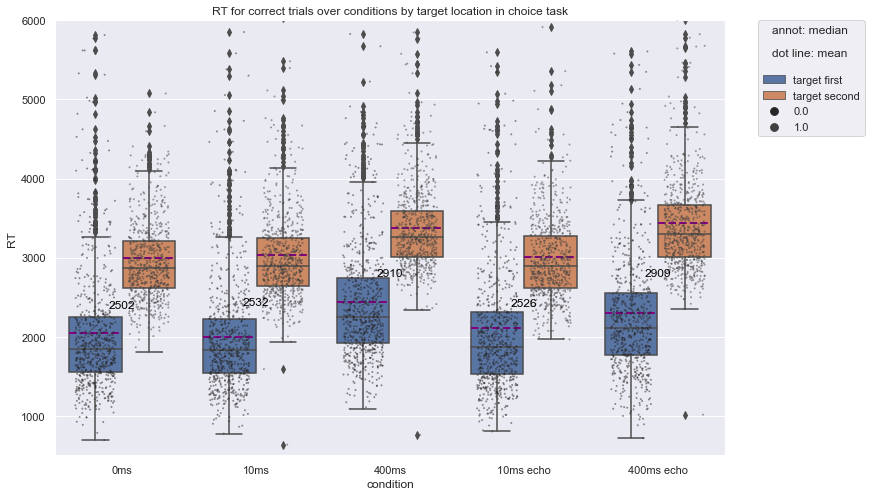

In [24]:
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(12, 8)

# assign proper labels
df_corr = df_corr.assign(loc=df_corr.target_loc.map({0: "target first", 1: "target second"}))

ax = sns.boxplot(y=df_corr['choice_response.rt'] * 1000, 
                 x="cond",
                 hue = "loc",
                 data=df_corr,
                 #order = condition_values,
                showmeans=True,
                 meanline = True,
                meanprops = dict(linestyle='--', linewidth=2, color='purple')
                )


sns.stripplot(y=df_corr['choice_response.rt'] * 1000, 
                 x="cond",
              hue = "target_loc",
                 data=df_corr,
             color=".25",
             size = 2,
             jitter = 0.3,
             dodge = True,
             alpha=0.5,
             label=None)

medians = df_corr.groupby(['cond'])['choice_response.rt'].median() *1000
vertical_offset = df['choice_response.rt'].median() * -50 # offset from median for display
for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,
            round(medians[xtick]), 
            horizontalalignment='center',
            #size='small',
            color='black',
            #weight='semibold'
           )

plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title ='annot: median \n\ndot line: mean\n',)

ax.set_xticklabels(condition_values)
ax.set(ylim=(500, 6000))
plt.xlabel('condition')
plt.ylabel('RT')
plt.title('RT for correct trials over conditions by target location in choice task')

# save plot as PNG
plt.savefig("figures/rt_choice_corr_by_condition_by_loc.png", dpi=192, bbox_inches='tight')

No handles with labels found to put in legend.


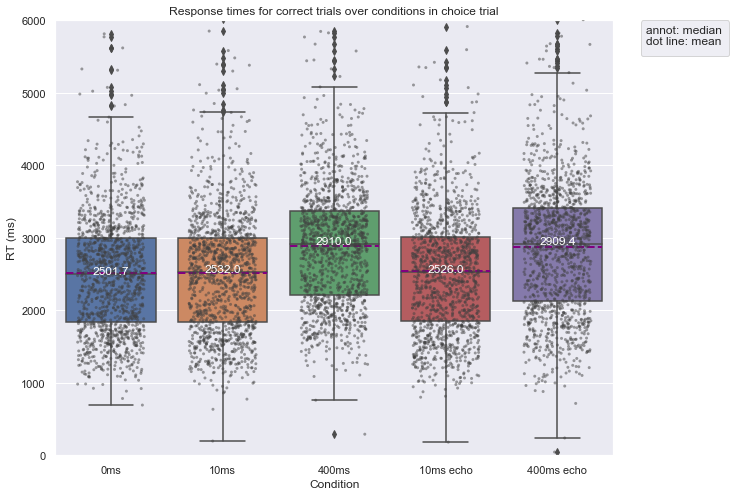

In [25]:
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

ax = sns.boxplot(y=df_corr['choice_response.rt'] * 1000, 
                 x="cond",
                 #hue = "participant",
                 data=df_corr,
                 #order = condition_values,
                showmeans=True,
                meanline = True,
                meanprops = dict(linestyle='--', linewidth=2, color='purple')
)
sns.stripplot(y=df_corr['choice_response.rt'] * 1000, 
                 x="cond",
                 data=df_corr,
             color=".25",
             size = 3,
              jitter = 0.3,
             alpha = 0.5,
             )

#ax.axhline(median_cond0, label = 'Median cond 0: ' + str(round(median_cond0,2)),color = 'green')
#ax.axhline(median_cond0 + 0.01, label = 'Median cond 0 plus 10 ms', color = 'red')
#ax.axhline(median_cond0 + 0.4, label = 'Median cond 0 plus 400 ms', color = 'yellow')

medians = df_corr.groupby(['cond'])['choice_response.rt'].median().round(4) *1000
vertical_offset = df_corr['choice_response.rt'].median() * 0.0002 # offset from median for display
for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,
            round(medians[xtick],3), 
            horizontalalignment='center',
            #size='x-small',
            color='w',
           # weight='semibold'
           )

plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title ='annot: median \ndot line: mean',)



#results = add_stat_annotation(ax, data=df_corr, y='choice_response.rt', x="cond", test='Mann-Whitney', order = order, box_pairs=[(0, 1)])
#results
ax.set_xticklabels(condition_values)
ax.set(ylim=(0, 6000))
plt.xlabel('Condition')
plt.ylabel('RT (ms)')
plt.title('Response times for correct trials over conditions in choice trial')

# save plot as PNG
plt.savefig("figures/rt_choice_corr_by_condition.png", dpi=192, bbox_inches='tight')

No handles with labels found to put in legend.


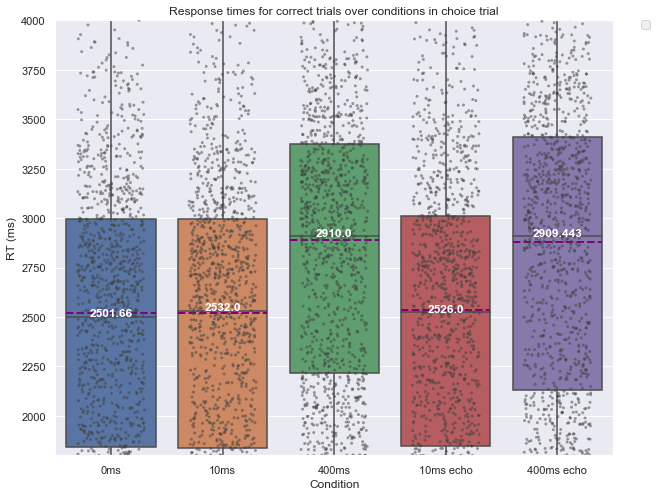

In [26]:
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

ax = sns.boxplot(y=df_corr['choice_response.rt'] * 1000, 
                 x="cond",
                 #hue = "participant",
                 data=df_corr,
                 #order = condition_values,
                showmeans=True,
                meanline = True,
                meanprops = dict(linestyle='--', linewidth=2, color='purple')
)
sns.stripplot(y=df_corr['choice_response.rt'] * 1000, 
                 x="cond",
                 data=df_corr,
             color=".25",
             size = 3,
              jitter = 0.3,
             alpha = 0.5,
             )

#ax.axhline(median_cond0, label = 'Median cond 0: ' + str(round(median_cond0,2)),color = 'green')
#ax.axhline(median_cond0 + 0.01, label = 'Median cond 0 plus 10 ms', color = 'red')
#ax.axhline(median_cond0 + 0.4, label = 'Median cond 0 plus 400 ms', color = 'yellow')

medians = df_corr.groupby(['cond'])['choice_response.rt'].median() *1000
vertical_offset = df_corr['choice_response.rt'].median() * 0.02 # offset from median for display
for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,
            round(medians[xtick],3), 
            horizontalalignment='center',
            #size='x-small',
            color='w',
            weight='semibold'
           )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


#results = add_stat_annotation(ax, data=df_corr, y='choice_response.rt', x="cond", test='Mann-Whitney', order = order, box_pairs=[(0, 1)])
#results
ax.set_xticklabels(condition_values)

ax.set(ylim=(1800, 4000))
plt.xlabel('Condition')
plt.ylabel('RT (ms)')
plt.title('Response times for correct trials over conditions in choice trial')

# save plot as PNG
plt.savefig("figures/rt_choice_corr_by_condition_zoomed.png", dpi=192, bbox_inches='tight')

## Accuracy in choice

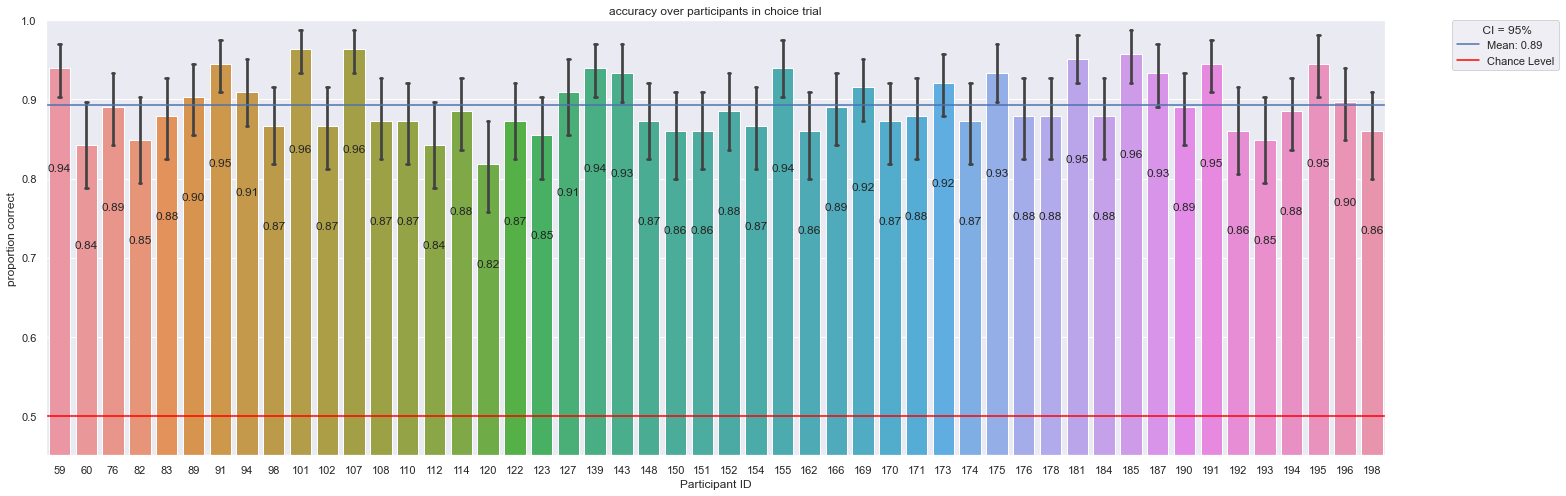

In [27]:
# calculate mean corr
mean_corr = df['choice_response.corr'].mean()
mean_corr

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(24, 8)




ax = sns.barplot(y='choice_response.corr',
                x= 'participant',
                 data=df, 
                  ci=95,
                 capsize=.1,
                )

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -100), 
                   textcoords = 'offset points')

ax.axhline(mean_corr, label = 'Mean: ' + str(round(mean_corr, 2)))
ax.set(ylim=(0.45, 1))
ax.set(ylabel="proportion correct")
ax.axhline(0.5, label = 'Chance Level', color = 'red')

# Change Axis labels:
#plt.legend(loc = 'upper left')
plt.xlabel('Participant ID')
#plt.ylabel('Count')
plt.title('accuracy over participants in choice trial')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = ' CI = 95%')

# save plot as PNG
plt.savefig("figures/choice_corr_by_participant.png", dpi=192, bbox_inches='tight')

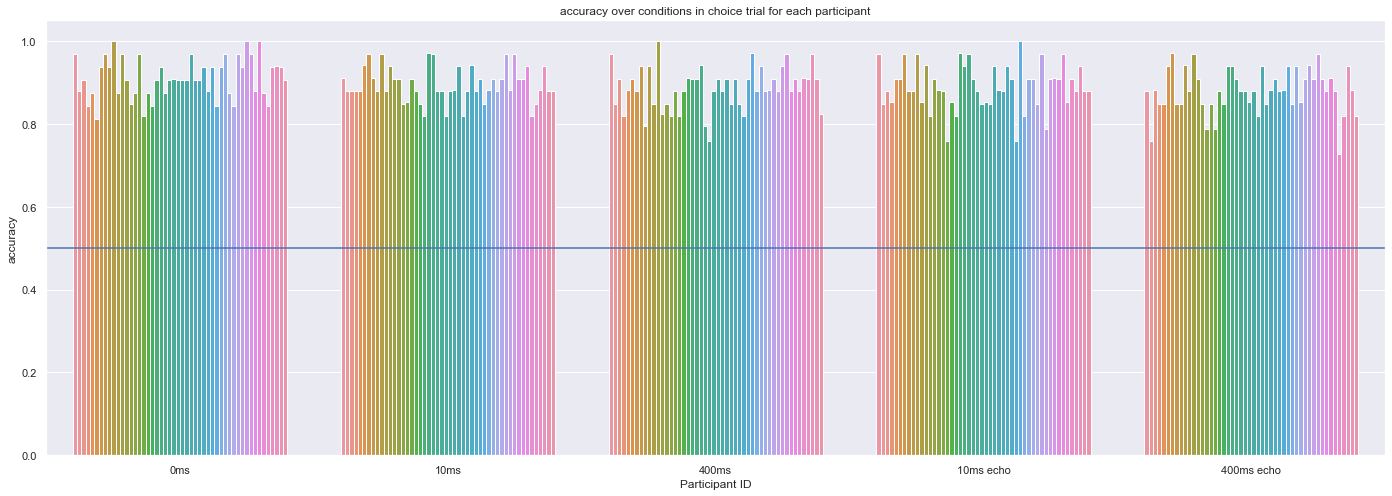

In [28]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(24, 8)

ax = sns.barplot(y= 'choice_response.corr',
              hue="participant",
                 x = 'cond',
                  ci=None,
              data=df)

ax.set(ylabel="accuracy")
ax.axhline(0.5, label = 'chance level')
ax.set_xticklabels(condition_values)


plt.xlabel('Participant ID')
#plt.ylabel('Count')
plt.title('accuracy over conditions in choice trial for each participant')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.get_legend().remove()

# save plot as PNG
#plt.savefig("figures/choice_corr_by_participant_by_cond.png", dpi=192, bbox_inches='tight')

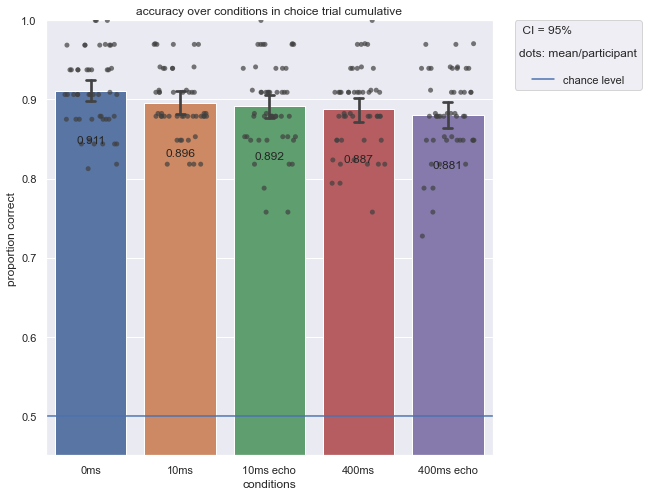

In [29]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(8, 8)

ax = sns.barplot(y= 'choice_response.corr',
              #hue="participant",
                 x = 'cond',
                  ci=95,
                  capsize=.1,
                 order=[0,1,3,2,4],
              data=df)
mean = df.groupby([ 'participant', 'cond',])['choice_response.corr'].mean().unstack()
ax =sns.stripplot(#y='choice_response.rt', 
                 #x="cond",
                 data=mean,
             #hue="participant",
             color=".25",
             size = 5,
              jitter = 0.3,
             order=[0,1,3,2,4],
             alpha = 0.7,
             )

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -50), 
                   textcoords = 'offset points')

ax.set(ylabel="proportion correct")
ax.axhline(0.5, label='chance level')
ax.set_xticklabels(condition_values_sorted)
ax.set(ylim=(0.45, 1))

# Change Axis labels:
#plt.legend(loc = 'upper left')
plt.xlabel('conditions')
#plt.ylabel('Count')
plt.title('accuracy over conditions in choice trial cumulative')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = ' CI = 95%\n\ndots: mean/participant\n ')

# save plot as PNG
plt.savefig("figures/choice_acc_by_cond.png", dpi=192, bbox_inches='tight')

# Analysis of SJ Trial 

We expect people not to be able to detect condition 1 and 3 , so we should see chance level performance
W

## Accuracy in SJ


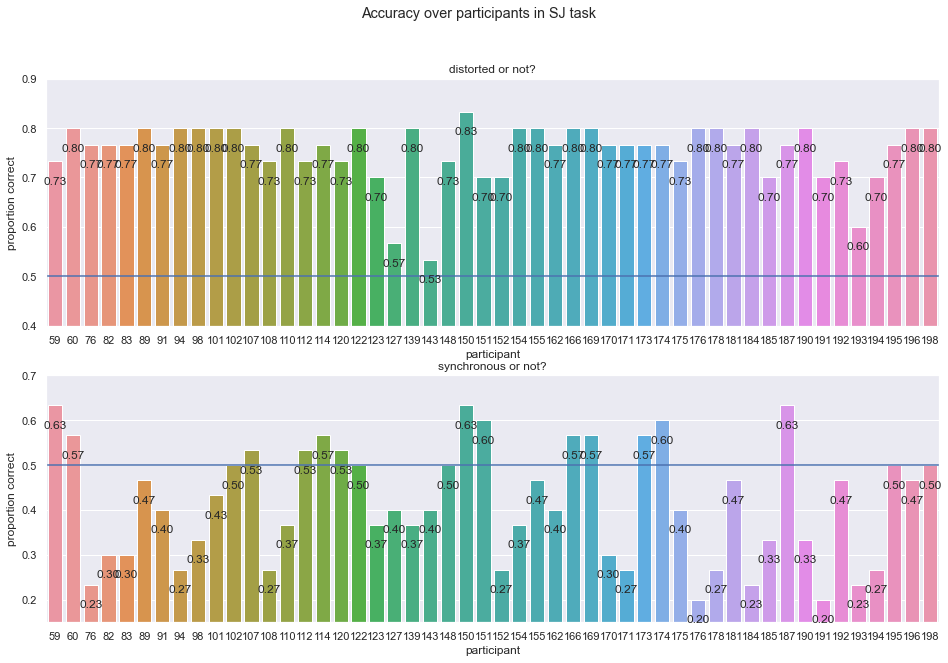

In [30]:
fig, axes = plt.subplots(2, 1)
# Change seaborn plot size
fig.set_size_inches(16, 10)

ax = sns.barplot(y= 'response_distortion.corr',
              x="participant",
               ax = axes[0],
                  ci=None,
              data=df,
                capsize=.1,
                )
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -20), 
                   textcoords = 'offset points')
ax.set_title('distorted or not?')
ax.set_ylabel('proportion correct')
ax.set_xlabel('participant')
ax.axhline(0.5)
ax.set(ylim=(0.4, 0.9))

ax2 = sns.barplot(y= 'response_sync.corr',
              x="participant",
               ax = axes[1],
                ci=None,
              data=df)
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -20), 
                   textcoords = 'offset points')
ax2.set_title('synchronous or not?')
ax2.set_ylabel('proportion correct')
ax2.set_xlabel('participant')
ax2.axhline(0.5)
ax2.set(ylim=(0.15, .7))

plt.suptitle('Accuracy over participants in SJ task')

# save plot as PNG
plt.savefig("figures/acc_sj_by_participant.png", dpi=192, bbox_inches='tight')

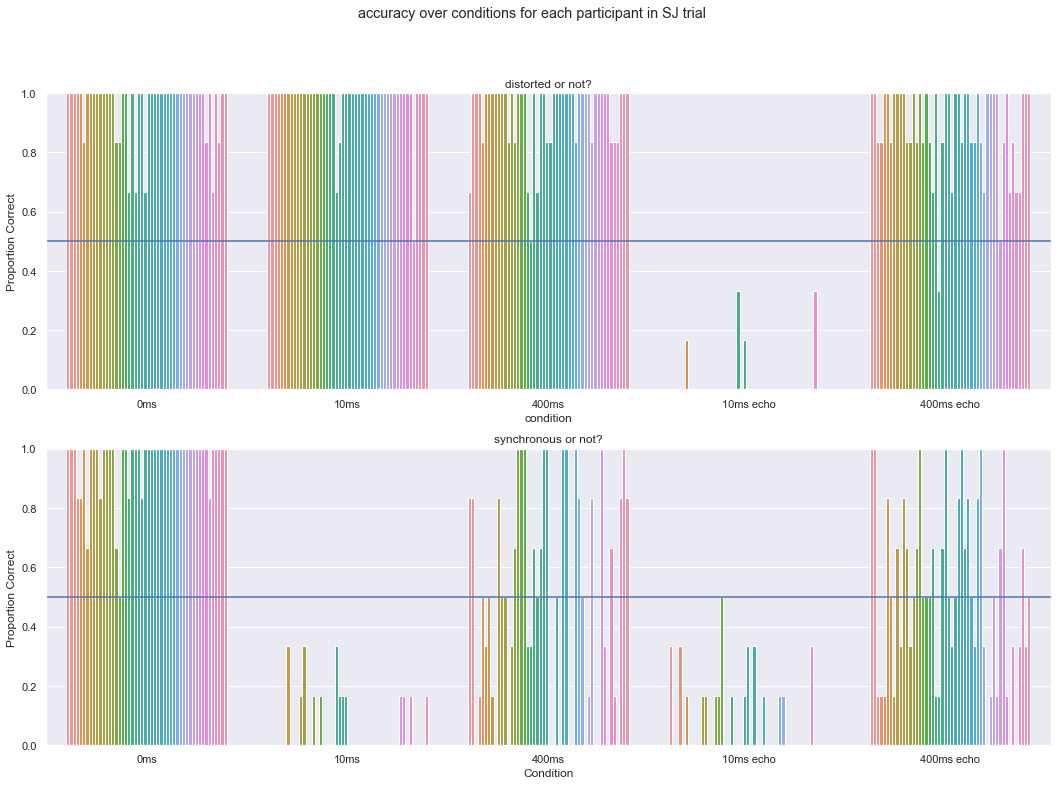

In [31]:
fig, axes = plt.subplots(2, 1)
# Change seaborn plot size
fig.set_size_inches(18, 12)

ax = sns.barplot(y= 'response_distortion.corr',
              hue="participant",
                 x = 'cond',
               ax = axes[0],
                  ci=None,
              data=df)
ax.set_xticklabels(condition_values)
ax.axhline(0.5)
ax.set(ylim=(0, 1))

ax.set_title('distorted or not?')
ax.set_ylabel('Proportion Correct')
ax.set_xlabel('condition')


ax2 = sns.barplot(y= 'response_sync.corr',
              hue="participant",
                 x = 'cond',
               ax = axes[1],
                ci=None,
              data=df)
ax2.axhline(0.5)
ax2.set(ylim=(0, 1))

ax2.set_xticklabels(condition_values)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.legend(bbox_to_anchor=(1.15, 1), loc=1, borderaxespad=0.)

ax.get_legend().remove()
ax2.get_legend().remove()


ax2.set_title('synchronous or not?')
ax2.set_ylabel('Proportion Correct')
ax2.set_xlabel('Condition')
plt.suptitle('accuracy over conditions for each participant in SJ trial')

# save plot as PNG
plt.savefig("figures/acc_sj_by_participant_by_cond.png", dpi=192, bbox_inches='tight')

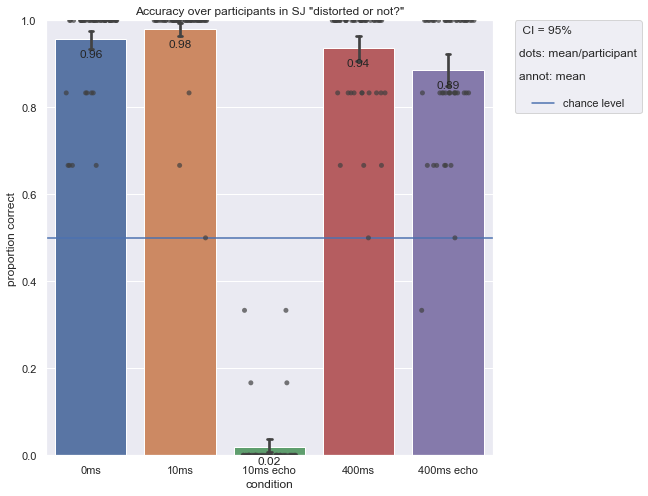

In [32]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(8,8)

ax = sns.barplot(y= 'response_distortion.corr',
              #hue="participant",
                 x = 'cond',
               #ax = axes[0],
                  ci=95,
                   order=[0,1,3,2,4],
                 capsize=.05,
              data=df)
mean = df.groupby([ 'participant', 'cond',])['response_distortion.corr'].mean().unstack()
ax =sns.stripplot(#y='choice_response.rt', 
                 #x="cond",
                 data=mean,
             #hue="participant",
             color=".25",
             size = 5,
              jitter = 0.3,
             order=[0,1,3,2,4],
             alpha = 0.7,
             )


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -15), 
                   textcoords = 'offset points')

ax.set_ylabel('proportion correct')
ax.set_xlabel('condition')

ax.set_xticklabels(condition_values_sorted)
ax.axhline(0.5, label = 'chance level')
ax.set(ylim=(0, 1))

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = ' CI = 95%\n\ndots: mean/participant\n\nannot: mean\n ')


plt.title('Accuracy over participants in SJ "distorted or not?"')

# save plot as PNG
plt.savefig("figures/acc_sj_by_cond_distort.png", dpi=192, bbox_inches='tight')

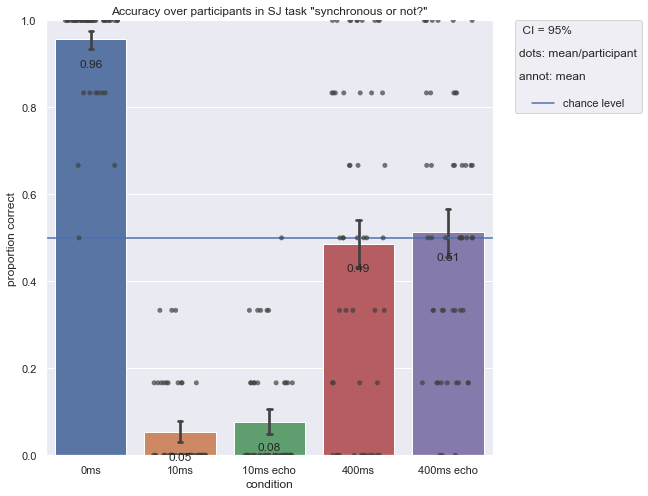

In [33]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(8,8)

ax = sns.barplot(y= df['response_sync.corr'],
              #hue="participant",
                 x = df['cond'],
               #ax = axes[0],
                  ci=95,
                   order=[0,1,3,2,4],
                 capsize=.05,
              #data=df
                )
mean = df.groupby([ 'participant', 'cond',])['response_sync.corr'].mean().unstack()
ax =sns.stripplot(#y='choice_response.rt', 
                 #x="cond",
                 data=mean,
    #hue="participant",
             color=".25",
             size = 5,
            jitter = 0.3,
             order=[0,1,3,2,4],
             alpha = 0.7,
             )

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -25), 
                   textcoords = 'offset points')
    
ax.set_ylabel('proportion correct')
ax.set_xlabel('condition')

ax.set_xticklabels(condition_values_sorted)
ax.axhline(0.5, label = 'chance level')
ax.set(ylim=(0, 1))

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = ' CI = 95%\n\ndots: mean/participant\n\nannot: mean\n ')

plt.title('Accuracy over participants in SJ task "synchronous or not?"')

# save plot as PNG
plt.savefig("figures/acc_sj_by_cond_sync.png", dpi=192, bbox_inches='tight')

## RT in SJ
We expect people to take longer, when they are uncertain, so RT should be fastest where performance is highest. 

No handles with labels found to put in legend.


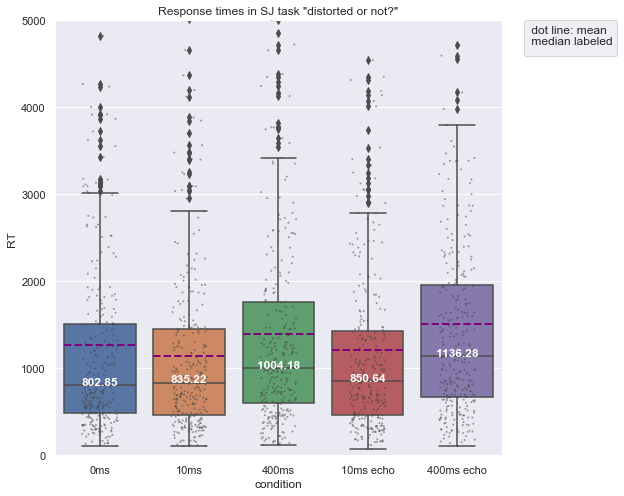

In [34]:
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(8, 8)

ax = sns.boxplot(y=df['response_distortion.rt'] * 1000, 
                 x="cond",
                 #hue = "participant",
                 data=df,
                # order=[0,1,3,2,4],
                showmeans=True,
                meanline = True,
                meanprops = dict(linestyle='--', linewidth=2, color='purple')
                )
ax = sns.stripplot(y=df['response_distortion.rt'] * 1000, 
                 x="cond",
                 data=df,
             color=".25",
             size = 2,
                  jitter = 0.2,
                alpha=0.5,)

medians = df.groupby(['cond'])['response_distortion.rt'].median() * 1000
vertical_offset = df['response_distortion.rt'].median() * 0.03 # offset from median for display
for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,
            round(medians[xtick],2), 
            horizontalalignment='center',
            #size='x-small',
            color='w',
            weight='semibold')

# Change Axis labels:
ax.set_xticklabels(condition_values)
ax.set(ylim=(0, 5000))
plt.xlabel('condition')
plt.ylabel('RT')
plt.title('Response times in SJ task "distorted or not?"')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = ' dot line: mean \n median labeled')

# save plot as PNG
plt.savefig("figures/rt_sj_dist_by_cond.png", dpi=96, bbox_inches='tight')


No handles with labels found to put in legend.


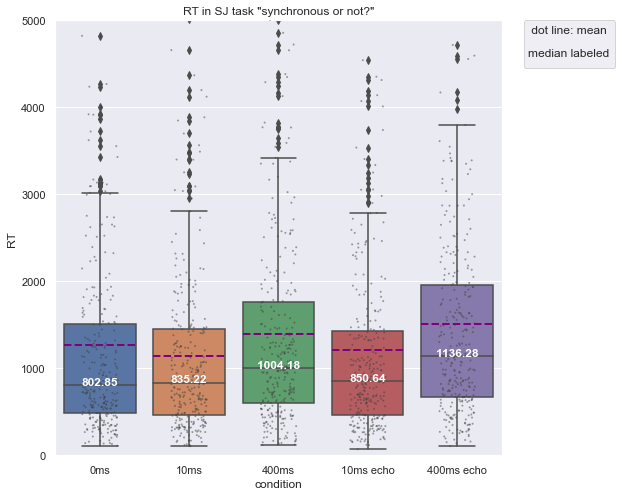

In [35]:
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(8, 8)

ax = sns.boxplot(y=df['response_distortion.rt'] * 1000, 
                 x="cond",
                 #hue = "participant",
                 data=df,
                 #order=[0,1,3,2,4],
                showmeans=True,
                meanline = True,
                meanprops = dict(linestyle='--', linewidth=2, color='purple'))
ax = sns.stripplot(y=df['response_distortion.rt'] * 1000, 
                 x="cond",
                 data=df,
             color=".25",
             size = 2,
                  jitter = 0.2,
                  alpha=0.5,)

medians = df.groupby(['cond'])['response_distortion.rt'].median() * 1000
vertical_offset = df['response_distortion.rt'].median() * 0.02 # offset from median for display
for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,
            round(medians[xtick],2), 
            horizontalalignment='center',
            #size='x-small',
            color='w',
            weight='semibold')

# Change Axis labels:
ax.set_xticklabels(condition_values)
ax.set(ylim=(0, 5000))
plt.xlabel('condition')
plt.ylabel('RT')
plt.title('RT in SJ task "synchronous or not?"')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = ' dot line: mean \n \nmedian labeled')
#for saving the image
plt.savefig("figures/rt_sj_sync_by_cond.png", dpi=96, bbox_inches='tight')

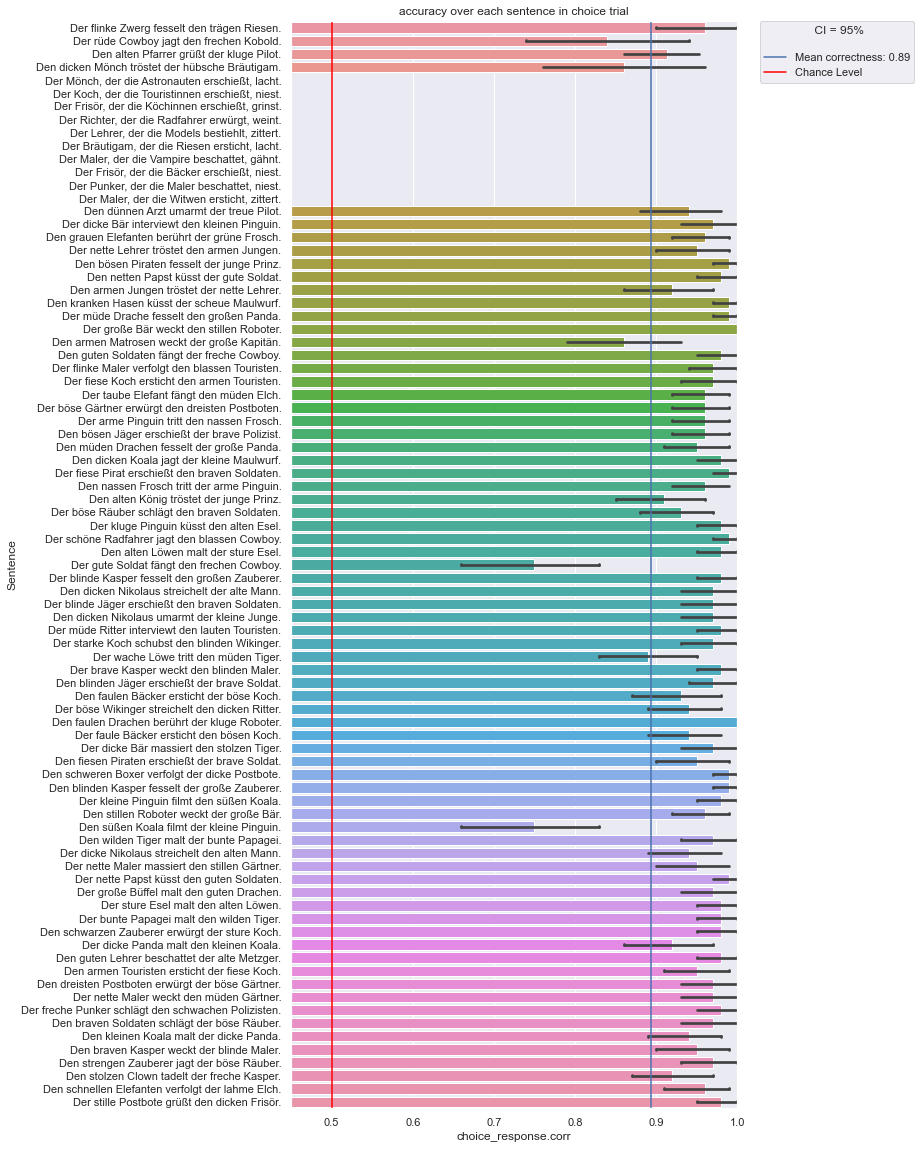

In [36]:
#correctness over items

# calculate mean corr
mean_corr = df['choice_response.corr'].mean()
mean_corr

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(8, 20)

ax = sns.barplot(x='choice_response.corr',
                y= 'sentence',
                 orient = 'h',
                 data=df_no_filler, 
                 capsize=.05,
                 # ci=None
                )

ax.axvline(mean_corr, label = 'Mean correctness: ' + str(round(mean_corr, 2)))

ax.set(ylabel="Proportion Correct")
ax.axvline(0.5, label = 'Chance Level', color = 'red')

ax.set(xlim=(0.45, 1))

# Change Axis labels:
#plt.legend(loc = 'upper left')
plt.ylabel('Sentence')
#plt.ylabel('Count')
plt.title('accuracy over each sentence in choice trial')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = ' CI = 95%\n ')

#for saving the image
plt.savefig("figures/acc_choice_by_sentence.png", dpi=96, bbox_inches='tight')

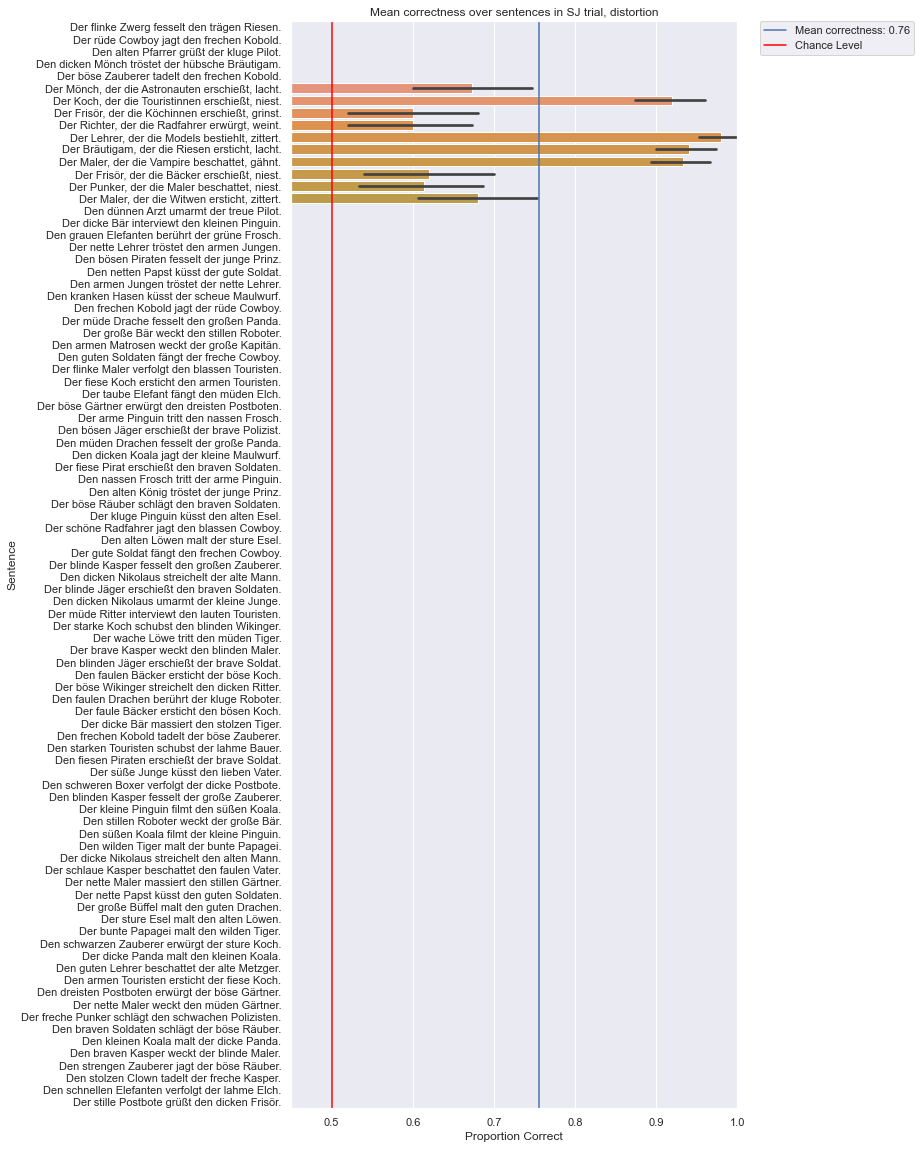

In [37]:
#correctness over items

# calculate mean corr
mean_corr = df['response_distortion.corr'].mean()
mean_corr

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(8, 20)

ax = sns.barplot(x='response_distortion.corr',
                y= 'sentence',
                 orient = 'h',
                 data=df, 
                  #ci=None
                )

ax.axvline(mean_corr, label = 'Mean correctness: ' + str(round(mean_corr, 2)))

ax.set(xlabel="Proportion Correct")
ax.axvline(0.5, label = 'Chance Level', color = 'red')
ax.set(xlim=(0.45, 1))

# Change Axis labels:
#plt.legend(loc = 'upper left')
plt.ylabel('Sentence')
#plt.ylabel('Count')
plt.title('Mean correctness over sentences in SJ trial, distortion')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#for saving the image
#plt.savefig("figures/acc_sj_by_sentence_distortion.png", dpi=192, bbox_inches='tight')

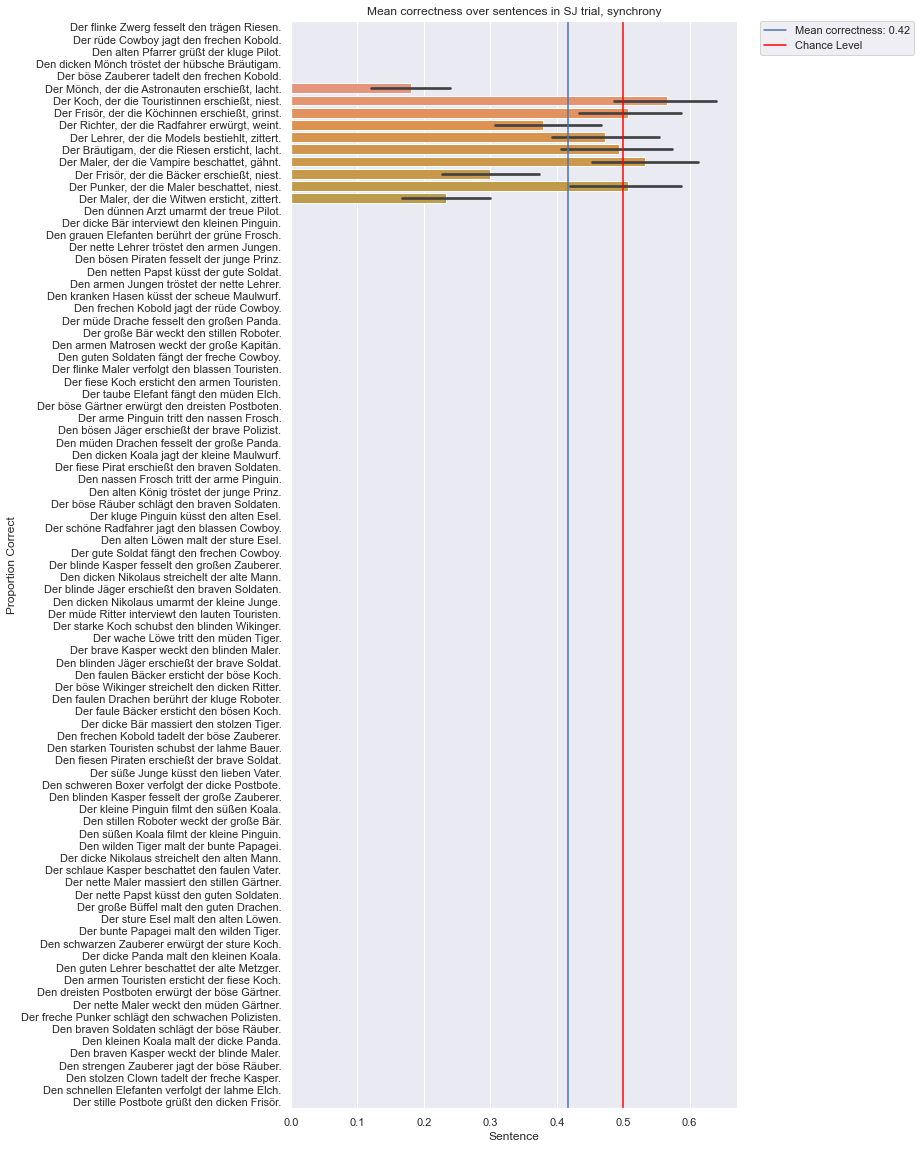

In [38]:
#correctness over items

# calculate mean corr
mean_corr = df['response_sync.corr'].mean()
mean_corr

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(8, 20)

ax = sns.barplot(x='response_sync.corr',
                y= 'sentence',
                 orient = 'h',
                 data=df, 
                  #ci=None
                )

ax.axvline(mean_corr, label = 'Mean correctness: ' + str(round(mean_corr, 2)))

ax.set(ylabel="Proportion Correct")
ax.axvline(0.5, label = 'Chance Level', color = 'red')
#ax.set(xlim=(0.45, 1))

# Change Axis labels:
#plt.legend(loc = 'upper left')
plt.xlabel('Sentence')
#plt.ylabel('Count')
plt.title('Mean correctness over sentences in SJ trial, synchrony')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#for saving the image
#plt.savefig("figures/acc_sj_by_sentence_synchrony.png", dpi=192, bbox_inches='tight')